0 00
1 000
2 000017
3 0001
4 000s26
5 002
6 00pm
7 025
8 03
9 10
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


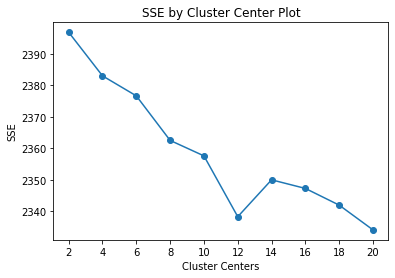

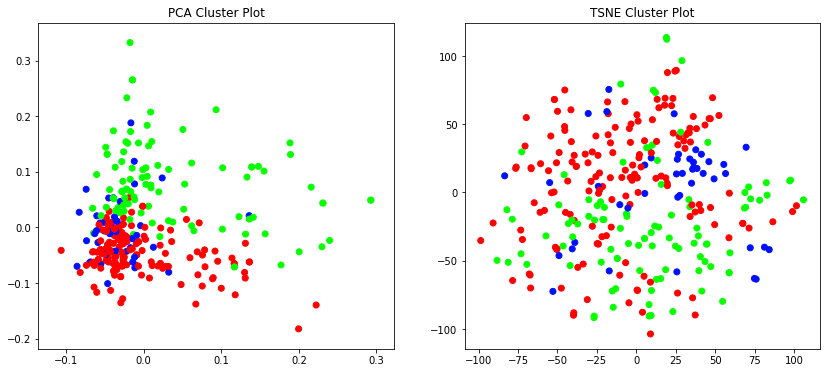

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm


def calculate_sentiment(tweets_df):
    # Making the copy of th data
    km=tweets_df

    
    # Tfidf Vectorizer
    tf=TfidfVectorizer()
    # Fit transform the data
    X=tf.fit_transform(km['text'].values)
    
    for i, feature in enumerate(tf.get_feature_names()[:10]):
        print(i, feature)
        
    def find_optimal_clusters(data, max_k):
        iters = range(2, max_k+1, 2)
        
        sse = []
        for k in iters:
            sse.append(MiniBatchKMeans(n_clusters=k, init_size=256, batch_size=512, random_state=20).fit(data).inertia_)
            print('Fit {} clusters'.format(k))
            
        f, ax = plt.subplots(1, 1)
        ax.plot(iters, sse, marker='o')
        ax.set_xlabel('Cluster Centers')
        ax.set_xticks(iters)
        ax.set_xticklabels(iters)
        ax.set_ylabel('SSE')
        ax.set_title('SSE by Cluster Center Plot')
    find_optimal_clusters(X, 20)
    
    
    def plot_tsne_pca(data, labels):
        max_label = max(labels)+1
        # max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
        try:
            max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
        except ValueError:
            max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)

        
        pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
        tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
        
        
        idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
        label_subset = labels[max_items]
        label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
        
        f, ax = plt.subplots(1, 2, figsize=(14, 6))
        
        ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
        ax[0].set_title('PCA Cluster Plot')
        
        ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
        ax[1].set_title('TSNE Cluster Plot')
        
    
    
    clusters = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)
    plot_tsne_pca(X, clusters)



if __name__ == "__main__":
    df = pd.read_csv("../data/tweets_cleaned.csv")
    df_sentiment = calculate_sentiment(df)